# HR Analytics Project- Understanding the Attrition in HR

Here according to the problem statement the major issue is with the attrition of the emplyee means the employes who left the organisation. Hence here the Target variabe is "left" and rest all are the predictor(feature) variables.

In [1]:
# importinng the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the data set into a data frame
df=pd.read_csv('HR_attrition_rate.csv')

## EDA (Exploratory Data Analysis)

In [3]:
# Showinng the first five rows
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


From the first five rows of the data set it is visible that the data set contains numerical as well as categorical values.

In [4]:
# finding the total number of rows and columns in the data set.
df.shape

(14999, 10)

From the above anaysis it is clear that the data set has 14999 number of rows and 10 columns.

In [5]:
# finding the null values in teh data set
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

The above analysis shows that there are no missing values in the data set

In [6]:
# finding the type of the variables
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments               object
salary                    object
dtype: object

The above analysis shows that there are two variables having string data(object) and rest 8 variables are of nuemerical type(int and float)

#### Summary Statistics

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


1. The above analysis shows that the mean and median of the values are nearly same hence nil or negligible skewness is there.
2. The three variables 'work accident, left & promotion_last_5years' are of categorical type as they are giving min value as '0' and max value as '1'.

In [8]:
# finding out the counts of individuals left the organisation and those who are with the organisation fromm the target variable.
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

The above count value shows that in the target variable 'left' there are 3571 employes who left the organisation and rest 11428 have continued with the organisation.

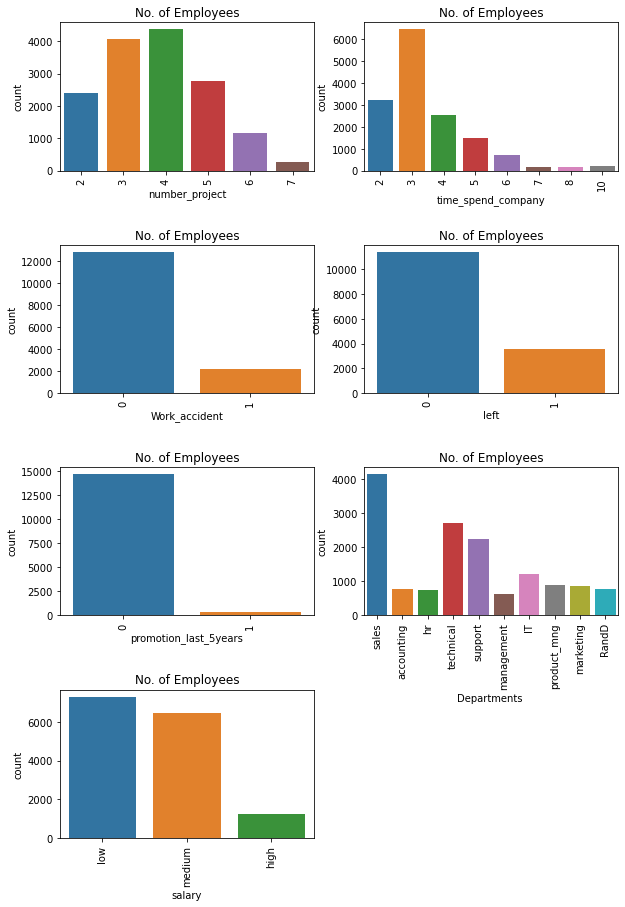

In [9]:
# finding out the data summary.
variables=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(variables):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = .5)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title("No. of Employees")

The above bar plot shows that
1. The major number of employes in the organisation have done 3 to 5 projects
2. Mostly the employess are with 3 years of experience.
3. There is very less number of employess met with work accident.
4. Mostly the number of employess belongs to sales, technical and support departments.
5. There are very less number of employess fall under the category of high salary most of the employees are having low salary and medium salary.

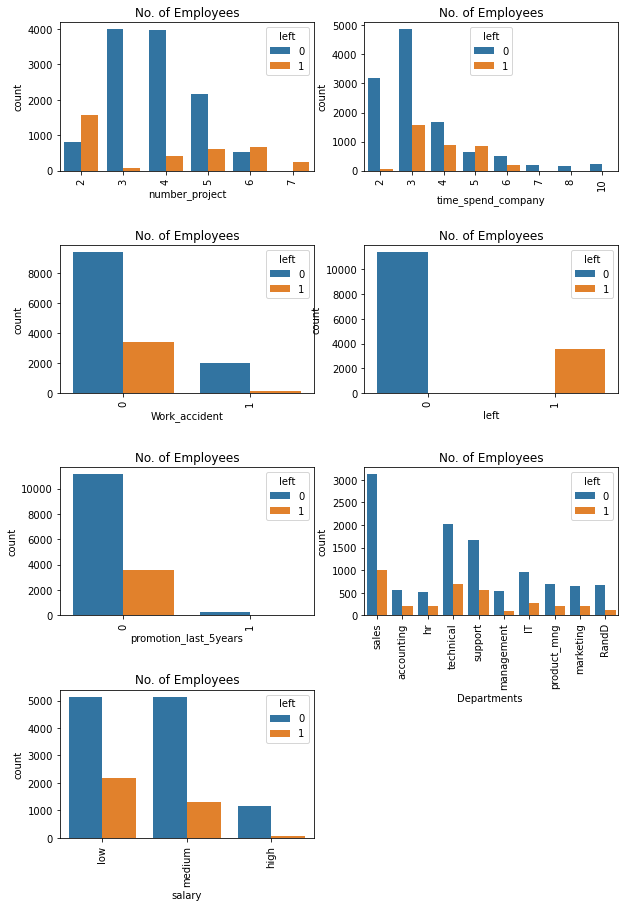

In [10]:
# finding out the data summary in accordance with the target variable 'left'
variables=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(variables):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = .5)
    sns.countplot(x=j,data = df, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of Employees")

The above analysis is done in relation with the target variable 'left'.
1. Mostly the employes who left the oraganisation are with 2 projects
2. Mostly the employess left afer spending 3 years or 4 years
3. Mostly the employees who did'nt receive promotions in last 5 years left the organisation. 
4. Mostly the employess with low salary bracket left the organisation. 

<AxesSubplot:>

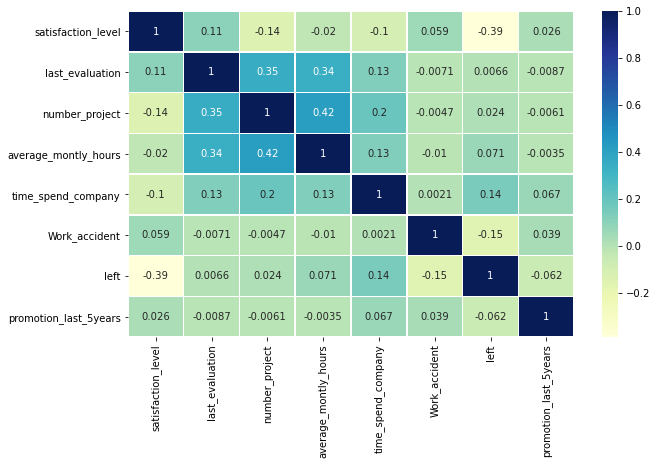

In [11]:
# Finding out the correlation among the variables.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True,linewidths=.5)

The above heat map shows the correlation of the variables with each other...
as clearly seen from the heat-map that none of the variables have high correlation with each other hence multicolinearity is not present.

In [12]:
# Importing the label encoder for converting the string values into numeric codes.
from sklearn.preprocessing import LabelEncoder

In [13]:
# changing the string values into numeric ones.
le=LabelEncoder()

list1=['Departments ','salary']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [14]:
# Checking--whether the values have convrted or not.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


<AxesSubplot:>

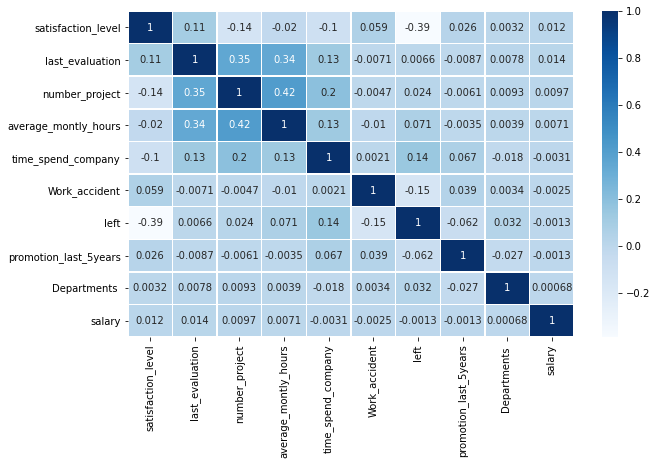

In [15]:
# Again checking the correlation after converrting the string values.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='Blues',annot=True,linewidths=.5)

Again trying to check the correlation among the variable after changing the string values to numeric ones.
No change is observed.

satisfaction_level           AxesSubplot(0.125,0.71587;0.227941x0.16413)
last_evaluation           AxesSubplot(0.398529,0.71587;0.227941x0.16413)
number_project            AxesSubplot(0.672059,0.71587;0.227941x0.16413)
average_montly_hours        AxesSubplot(0.125,0.518913;0.227941x0.16413)
time_spend_company       AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Work_accident            AxesSubplot(0.672059,0.518913;0.227941x0.16413)
left                        AxesSubplot(0.125,0.321957;0.227941x0.16413)
promotion_last_5years    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Departments              AxesSubplot(0.672059,0.321957;0.227941x0.16413)
salary                         AxesSubplot(0.125,0.125;0.227941x0.16413)
dtype: object

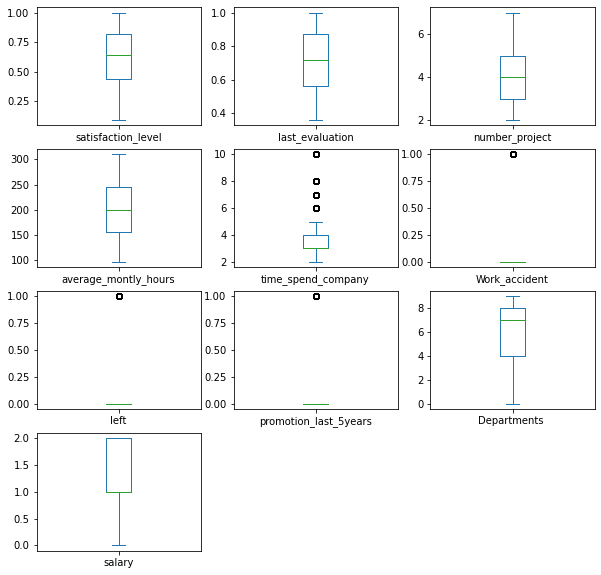

In [16]:
# finding out the outliers
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

The above analysis shows the outliers in the data set. 
1. The Box plot of time spend in the organisation is showing the outliers but this might be because of the reason that the employee have stayed in the organisation for a long time
2. The plots for variables 'left, Work_accident and prmotion_last_years' have only two types of values that is either 0 or 1 , hence the plot looks like this way.

### Seperating the target variable and the predictor (feature) variables.

In [17]:
x=df.loc[:,['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','Departments ','salary']] 

In [18]:
y=df.iloc[:,6:7]

In [19]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [20]:
y.head()

,left
0,1
1,1
2,1
3,1
4,1


In [21]:
x.shape

(14999, 9)

In [22]:
y.shape

(14999, 1)

### Standardising the data : Normalising the data 

In [23]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

### Spliting the data set into testing and training

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=45)

In [26]:
xtrain.shape

(10499, 9)

In [27]:
ytrain.shape

(10499, 1)

In [28]:
xtest.shape

(4500, 9)

In [29]:
ytest.shape

(4500, 1)

### Fitting the model for predicting target variable 'left'.

In [30]:
# importing necessary libraries.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [31]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
print('lr coef:',lr.coef_)
print('lr intercept:',lr.intercept_)
pred=lr.predict(xtest)
print('lr score:',lr.score(xtest,ytest))

lr coef: [[-0.16508806  0.01737305 -0.04289411  0.03210654  0.04838079 -0.05442388
  -0.02449963  0.01389788  0.00336745]]
lr intercept: [0.23962284]
lr score: 0.19553915545048928


In [32]:
rdg=Ridge(alpha=0.0001, random_state=45)
rdg.fit(xtrain,ytrain)
print('Ridge score:',rdg.score(xtrain,ytrain))
predict=rdg.predict(xtest)
print('r2_score:',r2_score(ytest,predict))

Ridge score: 0.1931574963514605
r2_score: 0.19553915550244294


In [33]:
lso=Lasso(alpha=.0001,random_state=45)
lso.fit(xtrain,ytrain)
print('Lasso score:',lso.score(xtrain,ytrain))
predict1=lso.predict(xtest)
print('r2 score:',r2_score(ytest,predict1))

Lasso score: 0.193156876482645
r2 score: 0.19554865550824196


In [34]:
en=ElasticNet(alpha=0.0001, random_state=45)
en.fit(xtrain,ytrain)
print('ElasticNet score:',en.score(xtrain,ytrain))
predict2=en.predict(xtest)
print('r2 score:',r2_score(ytest,predict2))

ElasticNet score: 0.19315732921317552
r2 score: 0.19554426179503992


In [35]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
print('dtr score:',dtr.score(xtrain,ytrain))

dtrpredict=dtr.predict(xtest)
print('dtr r2_score:', r2_score(ytest,dtrpredict))

print("Mean absolute error is=",mean_absolute_error(ytest,dtrpredict))
print("Mean squared error of dtr = ", mean_squared_error(ytest,dtrpredict))
print("Root Mean squared error of dtr = ",np.sqrt(mean_squared_error(ytest,dtrpredict)))

dtr score: 1.0
dtr r2_score: 0.8589444092492873
Mean absolute error is= 0.025333333333333333
Mean squared error of dtr =  0.025333333333333333
Root Mean squared error of dtr =  0.1591644851508443


In [36]:
# k=5
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(xtrain,ytrain)
print('knr score:',knr.score(xtrain,ytrain))

knrpredict=knr.predict(xtest)
print('knr r2_score:',r2_score(ytest,knrpredict))

print("Mean absolute error is=",mean_absolute_error(ytest,knrpredict))
print("Mean squareed error of knr =",mean_squared_error(ytest,knrpredict))
print("Root Mean squared error of knr=",np.sqrt(mean_squared_error(ytest,knrpredict)))

knr score: 0.8877513814906154
knr r2_score: 0.8079664238200823
Mean absolute error is= 0.054400000000000004
Mean squareed error of knr = 0.034488888888888895
Root Mean squared error of knr= 0.18571184369578828


In [37]:
# k=10
knr1=KNeighborsRegressor(n_neighbors=10)
knr1.fit(xtrain,ytrain)
print('knr1 score:',knr1.score(xtrain,ytrain))

knr1predict=knr1.predict(xtest)
print('knr1 r2_score:',r2_score(ytest,knr1predict))

print("Mean absolute error is =",mean_absolute_error(ytest,knr1predict))
print("Mean squareed error of knr1 =",mean_squared_error(ytest,knr1predict))
print("Root Mean squared error of knr1 =",np.sqrt(mean_squared_error(ytest,knr1predict)))

knr1 score: 0.8426333765941425
knr1 r2_score: 0.7855831287614824
Mean absolute error is = 0.06366666666666666
Mean squareed error of knr1 = 0.038508888888888884
Root Mean squared error of knr1 = 0.19623681838250662


In [38]:
# k=3
knr2=KNeighborsRegressor(n_neighbors=3)
knr2.fit(xtrain,ytrain)
print('knr2 score:',knr2.score(xtrain,ytrain))

knr2predict=knr2.predict(xtest)
print('knr2 r2_score:',r2_score(ytest,knr2predict))

print("Mean absolute error is=",mean_absolute_error(ytest,knr2predict))
print("Mean squareed error of knr2 =",mean_squared_error(ytest,knr2predict))
print("Root Mean squared error of knr2 =",np.sqrt(mean_squared_error(ytest,knr2predict)))

knr2 score: 0.9265665415213019
knr2 r2_score: 0.8156378682293316
Mean absolute error is= 0.04748148148148148
Mean squareed error of knr2 = 0.03311111111111111
Root Mean squared error of knr2 = 0.18196458751941574


In [39]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
print('sgd score:',sgd.score(xtrain,ytrain))

sgd1predict=sgd.predict(xtest)
print('sgd r2_score:', r2_score(ytest,sgd1predict))

print("Mean absolute error is=",mean_absolute_error(ytest,sgd1predict))
print("Mean squared error of sgd=",mean_squared_error(ytest,sgd1predict))
print("Root Mean squared error of sgd=",np.sqrt(mean_squared_error(ytest,sgd1predict)))

sgd score: 0.19130724566756863
sgd r2_score: 0.1942938434827004
Mean absolute error is= 0.3012327450722931
Mean squared error of sgd= 0.14470339334400653
Root Mean squared error of sgd= 0.380398992301513


From the above fitted models Decision Tree Regressor is giving the best r2 score as 85.89% and RMSE value as 0.15. Now going ahead with Ensemble techniques to improve upon the scores and finding the best model.

### Ensemble Techniques

In [40]:
rfr=RandomForestRegressor()
rfr.fit(xtrain,ytrain)
print('rfr score:',rfr.score(xtrain,ytrain))

rfr1predict=rfr.predict(xtest)
print('rfr r2_score:', r2_score(ytest,rfr1predict))

print("Mean absolute error is=",mean_absolute_error(ytest,rfr1predict))
print("Mean squared error of rfr=",mean_squared_error(ytest,rfr1predict))
print("Root Mean squared error of rfr=",np.sqrt(mean_squared_error(ytest,rfr1predict)))

rfr score: 0.9910168687573955
rfr r2_score: 0.922204253444726
Mean absolute error is= 0.03205555555555555
Mean squared error of rfr= 0.01397197777777778
Root Mean squared error of rfr= 0.11820312084618485


In [41]:
abr=AdaBoostRegressor()
abr.fit(xtrain,ytrain)
print('abr score:',abr.score(xtrain,ytrain))

abr1predict=abr.predict(xtest)
print('abr r2_score:', r2_score(ytest,abr1predict))

print("Mean absolute error is=",mean_absolute_error(ytest,abr1predict))
print("Mean squared error of abr=",mean_squared_error(ytest,abr1predict))
print("Root Mean squared error of abr=",np.sqrt(mean_squared_error(ytest,abr1predict)))

abr score: 0.7839908333109502
abr r2_score: 0.7739778514098079
Mean absolute error is= 0.07763804957056034
Mean squared error of abr= 0.04059317606964544
Root Mean squared error of abr= 0.2014774827856588


From the above Ensemble techniques Random Forest Regresssor is giving the better scores than Decision Tree Regressor.
The scores of Random Forest Regressor comes out to be: r2 score as 92.22% and RMSE as 0.11. Now going for cross validation of Random Forest Regessor and Decision Tree Classifiers Both 

### Cross Validation

In [42]:
score=cross_val_score(rfr,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.92936352 0.92878773 0.90887308 0.93912741 0.92116497]
0.9254633415400436
0.010066601800056032


In [43]:
score=cross_val_score(dtr,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.88585909 0.87844513 0.85871672 0.87824    0.86517419]
0.8732870257170964
0.009872251318886182


The Cross Validation score of Random Forest Regressor are the best. It is giving the Mean Score as 92.54% and vey low standard deviation as .01. Hence going for Hyperparametric Tuning ofRandom Forest Regressor.

### HyperParametric Tuning

In [44]:
param_grid = {  'bootstrap': [True], 
              'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2','sqrt',None], 
              'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [45]:
g_search = GridSearchCV(estimator = rfr, 
                        param_grid = param_grid, 
                        cv = 3, 
                        n_jobs = 1,
                        verbose = 0, 
                        return_train_score=True)

In [46]:
g_search.fit(xtrain, ytrain);

In [47]:
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 90}


In [48]:
modelrfr=RandomForestRegressor(bootstrap= True, max_depth= None, max_features= 'sqrt', n_estimators=90 )
modelrfr.fit(xtrain,ytrain)
print('modelrfr score:',modelrfr.score(xtrain,ytrain))

modelrfr1predict=modelrfr.predict(xtest)
print('modelrfr r2_score:', r2_score(ytest,modelrfr1predict))

print("Mean absolute error is=",mean_absolute_error(ytest,modelrfr1predict))
print("Mean squared error of rfr=",mean_squared_error(ytest,modelrfr1predict))
print("Root Mean squared error of rfr=",np.sqrt(mean_squared_error(ytest,modelrfr1predict)))

modelrfr score: 0.9919136051537579
modelrfr r2_score: 0.9334452551551129
Mean absolute error is= 0.0320320987654321
Mean squared error of rfr= 0.011953113854595337
Root Mean squared error of rfr= 0.10933029705710735


After Hyper parametric Tuning the Random Forest Model performance imporoved. The r2 score is comming as 93.34% and RMSE value is also comming low as 0.10

## Saving the best Model

In [49]:
import joblib

joblib.dump(modelrfr,'rfr_temperature_prediction_model.obj')

rfrloadmodel=joblib.load('rfr_temperature_prediction_model.obj')
pred=rfrloadmodel.predict(xtest)
print(pred)

[0.05555556 1.         0.01111111 ... 0.         0.         0.        ]


In [50]:
pr=np.round(pred,0)
pr

array([0., 1., 0., ..., 0., 0., 0.])